In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from varqus.ode import define_vqs_ode, define_schrodinger_ode
from varqus.integrators import euler

# 2 qubits

In [2]:
J = 1/2
B = 1/2
fs = [[-1j*J], [-1j*B, -1j*B]]
params_init = np.array([1.0, 1.0])
ops = [["ZZ"], ["XI", "IX"]]

hs = [-2.0*J, -B, -B] # Hamiltonian non-dependent on time
# hs = lambda t: [-2*J*np.cos(t), -B*np.cos(t), -B*np.sin(t)] # Hamiltonian parameters dependent on time # FAKE DATA FTW

opsH = ["ZZ", "XI", "IX"]

state = np.ones(4, dtype=complex)/2
state_vqe = state

# Time discretization
dt = 1e-3
Nt = int(2.0*1e3/(2.0*np.pi))

In [3]:
ode_an = define_vqs_ode(ops, opsH, fs, hs, state_vqe, backend='analytic')    # Define the diff. equation RHS as a function of the parameters
params_evolved_an = euler(ode_an, params_init, dt, Nt)                       # Integrate in time!

Text(0.5, 1.0, 'Analytic')

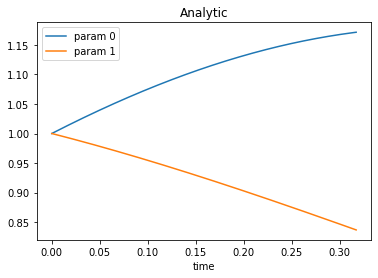

In [4]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved_an, label = [f"param {i}" for i in range(params_evolved_an.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [5]:
# Through the circuit

ode_sim = define_vqs_ode(ops, opsH, fs, hs, state_vqe, shots=2**13)    # Define the diff. equation RHS as a function of the parameters
#params_evolved_sim = euler(ode_sim, params_init, dt, Nt)  # Integrate in time!


In [6]:
# Guardar parametros simulados

# params_sim = h5py.File("params_2qubits.hdf5", "w")
# dset = params_sim.create_dataset("params", np.shape(params_evolved_sim), data=params_evolved_sim)
# params_sim.close()

# Cargar estados

params_sim = h5py.File('params_2qubits.hdf5', 'r')
params_evolved_sim = params_sim["params"][:]

Text(0.5, 1.0, 'Circuit')

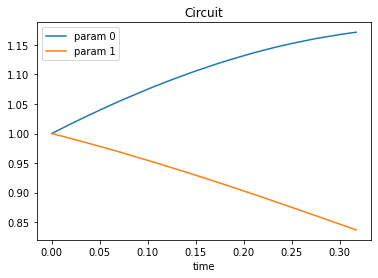

In [7]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved_sim, label = [f"param {i}" for i in range(params_evolved_sim.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")

In [8]:
from varqus.states import state_from_parameters
from varqus.ode import define_schrodinger_ode

initial_state_ising = state_from_parameters(params_init, ops, fs, state)

schrodinger = define_schrodinger_ode(opsH, hs)
analytic_evolution = euler(schrodinger, initial_state_ising, dt, Nt)

In [9]:
# Recover the states from its simulated parameters


state_evolved_simulation = [state_from_parameters(params_evolved_sim[t], ops, fs, state) for t in range(Nt)]

#params_evolved_sim[0]

Text(0.5, 1.0, 'Infidelity')

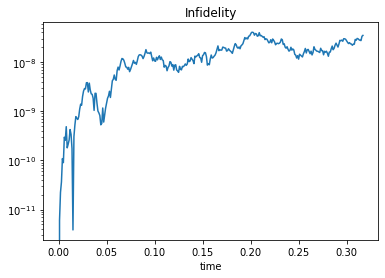

In [10]:
# Calculate infidelity from the analytic vqe with schrodinger equation solution using matrix exponentiation

#import importlib
#importlib.reload(varqus)

from varqus.states import state_infidelity

infidelity = [state_infidelity(analytic_evolution[t], state_evolved_simulation[t]) for t in range(Nt)]

plt.semilogy(dt*np.arange(Nt), infidelity)
plt.xlabel("time")
plt.title("Infidelity")